# Анализ объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Основная задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Введение

Для исследования нам предоставлены данные архива объявлений сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населенных пунктов за последние несколько лет. 

**Основными целями исследования выступают:**
1. Изученение скорости продажи квартир на территории города Санкт-Петербур и в ближайших населенных пунктах; 
2. Определение факторов, влияющих на общую (полную) стоимость объектов;
3. Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений;
4. Выделение населённых пунктов с самой высокой и низкой стоимостью квадратного метр;
5. Выделение средней цены квартир в диапазоне от 1 до 10 км от центра города Санкт-Петербург.
6. Определить влияние стоимости объектов от расстояния до центра города.

**Ход исследования** 

Данные о недвижимости содержатся в файле `/datasets/real_estate_data.csv'`. О качестве предоставляемой информации ничего неизвестно в техническом задании Заказчика. Для перехода к исследованию необходимо для начала проверить данные. 
В рамках проверки необходимо будет осуществить ряд мероприятий: 
- анализ данных файла, 
- поиск пропущенных значений, аномалий и дубликатов;
- при необходимости будет осуществлена предработка данных и добавление необходимых столбцов. 

**Для осуществления исследования понадобится осуществить:**
1. Анализ первоначальных данных;
2. Предработка данных; 
3. Добавление необходимых столбцов; 
4. Определение факторов и закономерностей, влияющих на на общую (полную) стоимость объектов;
5. Проведение расчетов, их визуализация в таблицах, гистограммах и графиках;
6. Описание исследований в выводах. 



## Откройте файл с данными и изучите общую информацию. 

### Импортируем таблицу 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import numpy as np

**Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`**

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

### Смотрим общую информацию о таблице

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Рассматриваем общую информацию о датафрейме 2**

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В таблице 21 столбец. В соответствии с имеющейся документацией к данным:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Присутствуют разные типы данных - bool, float, int и object.



**Выводы:** 
- Пропуски в столбцах: ceiling_height, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition;
- Тип переменной is_apartment не соотвествует документации, должен быть bool;
- Для экономии памяти и удобства расчета last_price целесообразно перевести в тип int;
- Столбцы floors_total, balcony, parks_around3000, ponds_around3000, days_exposition по смыслу не могут содержать дробные числа, необходимо перевести в int;
- В столбце first_day_exposition необходимо преобразовать к формату datetime, так с ним будет удобнее работать.

## Предобработка данных

### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов

In [6]:
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Исходя из полученных данных, мы видим, что есть 5 столбцов, где доля пропусков очень велика: 
- **ceiling_height** 
- **is_apartment** 
- **balcony** 
- **parks_nearest** 
- **ponds_nearest** 

6 столбца, где доля пропусков невелика: 
- **living_area** 
- **kitchen_area** 
- **airports_nearest**
- **cityCenters_nearest** 
- **parks_around3000**
- **ponds_around3000**
- **days_exposition** 

И 2 столбца, где доля пропусков крайне мала: 
- **floors_total**
- **locality_name**

Начнем заполнение пропусков в вышеуказанных столбцах. Поскольку ряд столбцов не играет существенной роли для дальнейшего рассмотрения нашего процесса, заполним пропущенные данные нулями. 


#### Заполняем пропущенные значения в столбце `balcony` 

Скорее всего собственники квартир или домов не указали в разделе `балконы` их наличие, в связи с тем, что они отсутствуют. 
Заменим пропущенные значения на `0`

In [7]:
data['balcony'] = data['balcony'].fillna(0)

#### Заполняем пропущенные значения в столбце `airports_nearest`, `parks_around3000`, `ponds_around3000`, `parks_nearest`, `ponds_nearest`


Найти пропущенные значения вышеуказанных пропусков является достаточно проблематичным, в особенности, если нет информации о наличии рядом с населенным пунктом аэропорта, парка и тд. Кроме того, для дальнейшего исследования они не играют существенной роли. 
Заполним пропуски в вышеуказанных столбцах значением `0`

In [8]:
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest            0
cityCenters_nearest      5519
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition          3181
dtype: int64


#### Заполняем пропущенные значения в столбце `cityCenters_nearest` 

Зачастую от удаленности от центра города зависит стоимость недвижимости, поэтому вначале заполним столбец `cityCenters_nearest`. Условно сгруппируем дистанцию от центра города

In [9]:
def distance_ceiling_height(row):
    if row['cityCenters_nearest'] < 2500:
        return 'центр'
    elif row['cityCenters_nearest'] < 5000:
        return 'недалеко от центра'
    elif row['cityCenters_nearest'] < 17000:
        return 'в пределах города'
    elif row['cityCenters_nearest'] >= 17000:
        return 'Область'

Добавим столбец для просмотра удаленности от центра города `distance_to_center`

In [10]:
data['distance_to_center'] = data.apply(distance_ceiling_height, axis=1)

Рассмотрим удаленность от города 

In [11]:
data[['locality_name', 'cityCenters_nearest', 'distance_to_center']].head(15)

,locality_name,cityCenters_nearest,distance_to_center
0,Санкт-Петербург,16028.0,в пределах города
1,посёлок Шушары,18603.0,Область
2,Санкт-Петербург,13933.0,в пределах города
3,Санкт-Петербург,6800.0,в пределах города
4,Санкт-Петербург,8098.0,в пределах города
5,городской посёлок Янино-1,NaN,None
6,посёлок Парголово,19143.0,Область
7,Санкт-Петербург,11634.0,в пределах города
8,посёлок Мурино,NaN,None
9,Санкт-Петербург,15008.0,в пределах города


Так как дистанция к центру города является важным показателем в настойщей работе, заполним пропущенные значения методом `median()` для населенных пунктов, находящихся за пределами города Санкт-Петербург

In [12]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] != 'Cанкт-Петербург') & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == t), 'cityCenters_nearest'].median()

Посмотрим на результаты заполнения пропущенных значений в столбце `cityCenters_nearest`

In [13]:
data['cityCenters_nearest'].isnull().sum()

0

Как мы видим, все пропуски заполнены. Переходим дальше

#### Заполняем пропущенные значения в столбце `Ceiling_height`

Пропусков в столбце `ceiling_height` - 9195. Поскольку Санкт-Петербург это город, в котором в центре  расположено большинство домов старой планировки с высокими потолками, попробуем заполнить пропуски взависимости от удаленности от центра города. 



Сгруппируем значения и посмотрим на среднюю высоту потолков в зависимости от удаленности от центра города

In [14]:
data.groupby('distance_to_center')['ceiling_height'].mean().sort_values(ascending=False)

distance_to_center
центр                 3.239759
недалеко от центра    3.189076
в пределах города     2.744391
Область               2.677288
Name: ceiling_height, dtype: float64

Добавим средние значения в зависимости от категории в ячейки с пропусками

In [15]:
data['distance_to_center'] = data.apply(distance_ceiling_height, axis=1)
for t in data['distance_to_center'].unique():
    data.loc[(data['distance_to_center'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['distance_to_center'] == t), 'ceiling_height'].mean()


data.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_to_center
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.00,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,в пределах города
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.677288,11.0,18.60,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,Область
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.735673,5.0,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,в пределах города
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.735673,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,в пределах города
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14.0,32.00,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,в пределах города
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.735673,12.0,14.40,5,NaN,...,0.0,городской посёлок Янино-1,0.0,12244.5,0.0,0.0,0.0,0.0,55.0,в пределах города
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.677288,26.0,10.60,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0,Область
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.735673,24.0,NaN,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN,в пределах города
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.735673,27.0,15.43,26,NaN,...,0.0,посёлок Мурино,0.0,12244.5,0.0,0.0,0.0,0.0,189.0,в пределах города
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.500000,9.0,43.60,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0,в пределах города


In [16]:
data['ceiling_height'].isnull().sum()

0

Мы добавили все необходимые нам значения в столбец. Двигаемся дальше

#### Заполняем пропущенные значения в столбце `is_apartment` 

Рассмотрим столбец с самым большим количеством пропусков данных. Для начала посмотрим какие значения имеются в данном столбце. Исходя из просмотра данных 50 первых и 50 последних значений найдены только булевые значения `False`

In [17]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Преобразуем столбец в булевое значение и посмотрим, как изменятся данные с пропусками

Полученные данные свидетельствуют о том, что в таблице имеются обе категории. Сделаем условный вывод о том, что возможно при заполнении данного столбца пользователи руководствовались тем, что по законодательству РФ у нас имеется такая категории недвижимости, как `апартаменты` и соответственно они заполняли эти данные. После этого заменим все пропущенные значения на булевые `False`


In [18]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

#### Заполняем пропущенные значения в столбцах `living_area` и `kitchen_area`

Данные столбцы являются важными для дальнейшей работы, рассмотрим возможность заполнения в них данных. В настоящее время очень популярны квартиры-студии, рассмотрим, какое количество пропусков может ими являться c помощью метода `query()`. 



In [19]:
data.query('rooms == 0')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    197
living_area      14
dtype: int64

Полученные данные говорят, что лишь малая часть является квартирами-студиями и внесение данных в общую таблицу в целом не повлияет на результат. Оставляем, как есть. 

#### Анализ пропусков в столбце  `days_exposition` 

Данные в столбце важны для исследования, Однако информация в нем может отсутствовать, к примеру, объявление о продаже не закрыто. Так, недвижимость может быть продана на дату проведения анализа, однако объявление не закрыто. Заполнение данных в данном столбце может привести к неточному анализу. Пропустим. 


####  Заполняем пропуски в столбце `locality_name`

Заполним часть пропущенных данных с учетом расстояния от центра города. То есть, если расстояния до центра города является менее 10000 км - пропущенные значение будет `Cанкт-Петербург`

In [20]:
data.loc[(data['locality_name'].isnull()) & (data['cityCenters_nearest'] < 10000), 'locality_name'] = data.loc[(data['locality_name'].isnull()) & (data['cityCenters_nearest'] < 10000), 'locality_name'].fillna('Санкт-Петербург')


Рассмотрим какое количество пропусков мы смогли заполнить таким способом. 

In [21]:
data['locality_name'].isnull().sum()

24

Заполнено более половины. Хороший результат, двигаемся дальше. 


####  Заполняем пропуски в столбце `floors_total`

Перед заполнением пропусков попробуем проанализовать, какое количество у нас уникальных совпадений имеет столбец `floors_total`


In [22]:
data['floors_total'].value_counts()


5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

Из представленных данных следует, что количество этаже в квартирах находится в диапазоне от 1 до 60. 

Посмотрим медианное и среднее значение. 


In [23]:
data_city_median = data.loc[(data['locality_name'] == 'Санкт-Петербург'), 'floors_total'].median()
data_city_mean = data.loc[(data['locality_name'] == 'Санкт-Петербург'), 'floors_total'].mean()
print(f'Медианное значение: {data_city_median}')
print(f'Среднее значение: {data_city_mean}')

Медианное значение: 9.0
Среднее значение: 11.386323041592243


Попробуем посмотреть какое значения имеется в ячейках `floor`, где имеются пропущенные значения столбец `floor_total`

In [24]:
data.query('floors_total.isnull()')[['floors_total', 'floor']].head(30)


,floors_total,floor
186,NaN,4
237,NaN,1
457,NaN,12
671,NaN,8
1757,NaN,9
1930,NaN,4
2392,NaN,22
2846,NaN,15
2952,NaN,6
3031,NaN,12


Диапазон значений составляет от 3 и до 24. Ни медиана, ни среднее значение здесь не подходит. 
Заменим пропущенные значения в столбце `floor_total` значениями столбца `floor`

In [25]:
data.loc[(data['floors_total'].isnull()) & (data['locality_name'] == 'Санкт-Петербург'), 'floors_total'] = data.loc[(data['floors_total'].isnull()) & (data['locality_name'] == 'Санкт-Петербург'), 'floors_total'].fillna(data['floor'])
data['floors_total'].isna().sum()

16

Заполнено 82 значения из 86. Переходим дальше

####  Рассмотрим результаты нашей работы и подведем часть итогов

In [26]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              16
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name             24
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
distance_to_center         0
dtype: int64

Исходя из заполнения пропусков была проделана большая, которая включает: 

1. Заполнение всех пропусков в столбцах: 
- `ceiling_height`
-`cityCenters_nearest`
-`balcony`
- `is_apartment`

2. Заполнения части пропусков в столбцах:
-`floors_total`
-`locality_name`

3. Заполнения пропусков значением `0`, в связи с отсутствием дополнительной информации информации:
- `airports_nearest` 
- `parks_around3000` 
- `ponds_around3000`
- `parks_nearest`
- `ponds_nearest`

4. Принято решение о незаполнении пропусков в следующих столбцах:
- `days_exposition`
- `kitchen_area`
- `living_area`

### Изменение типов данных

#### Рассмотрим имеющиеся типы данных

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23683 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23675 non-null  object 
 15  airports_nearest   

Выведем первые 5 строк для более удобного рассмотрения и внесения изменений

In [28]:
data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_to_center
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.00,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,в пределах города
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.677288,11.0,18.60,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,Область
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.735673,5.0,34.30,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,в пределах города
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.735673,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,в пределах города
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14.0,32.00,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,в пределах города
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.735673,12.0,14.40,5,False,...,0.0,городской посёлок Янино-1,0.0,12244.5,0.0,0.0,0.0,0.0,55.0,в пределах города
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.677288,26.0,10.60,6,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0,Область
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.735673,24.0,NaN,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN,в пределах города
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.735673,27.0,15.43,26,False,...,0.0,посёлок Мурино,0.0,12244.5,0.0,0.0,0.0,0.0,189.0,в пределах города
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.500000,9.0,43.60,7,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0,в пределах города


Исходя из имеющихся данных, можно внести изменения в следующие столбцы:
- `last_price` `floors_total`, `balcony`, `airports_nearest`, `cityCenters_nearest`,  `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` - поменяем на целочисленный формат.
- `first_day_exposition` - изменим формат времени;
- `total_area`, `ceiling_height`, `living_area`, `kitchen_area` - округлим до одного знака после запятой;


####  Изменение формата столбцов на  `int` 

In [29]:
list_int = ['last_price', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'living_area', 'kitchen_area']

for column in list_int:
    data[column] = data[data[column].notnull()][column].astype('int')

#### Округление в столбцах до одного знака перед запятой

In [30]:
list_float = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']

for column in list_float:
    data[column] = data[data[column].notnull()][column].round(1)

####  Изменение формата времени

In [31]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

####  Анализ полученных результатов

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23683 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [33]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_to_center
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,в пределах города
1,7,3350000,40.4,2018-12-04,1,2.7,11.0,18.0,1,False,...,2,посёлок Шушары,12817,18603,0,0,0,0,81.0,Область
2,10,5196000,56.0,2015-08-20,2,2.7,5.0,34.0,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,в пределах города
3,0,64900000,159.0,2015-07-24,3,2.7,14.0,NaN,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0,в пределах города
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,в пределах города


Вносимые изменения формата по столбцам связаны со следующим:
- `last_price` - для дальнейшего анализа копейки на не нужны;
- `balcony`, `ponds_around3000`, `ponds_nearest`, `days_exposition` - единичные значение, не могут быть в формате float;
- `total_area`, `ceiling_height`, `living_area`, `kitchen_area` - измеряются в квадратных метрах, несколько знаков после сотые знать нам нет необходимости;
- `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`,  - измеряются в км, значения после запятой нам не нужны при дальнейшем анализе.  

### Обработка дубликатов

####  Рассмотрение уникальные значений в столбце `locality_name`

In [34]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [35]:
data['locality_name'].value_counts()

Санкт-Петербург                        15746
посёлок Мурино                           522
посёлок Шушары                           440
Всеволожск                               398
Пушкин                                   369
                                       ...  
посёлок Алексеевка                         1
деревня Лаврики                            1
поселок Пчевжа                             1
поселок городского типа Кондратьево        1
деревня Мануйлово                          1
Name: locality_name, Length: 364, dtype: int64

####  Устраним явные дубликаты

Выведем на экран количество строк-дубликатов

In [36]:
data.duplicated().sum()

0

Проверка на явные дубликаты показала, что они отсутствуют

####  Устранение неявные дубликатов

In [37]:
data['locality_name'].value_counts()

Санкт-Петербург                        15746
посёлок Мурино                           522
посёлок Шушары                           440
Всеволожск                               398
Пушкин                                   369
                                       ...  
посёлок Алексеевка                         1
деревня Лаврики                            1
поселок Пчевжа                             1
поселок городского типа Кондратьево        1
деревня Мануйлово                          1
Name: locality_name, Length: 364, dtype: int64

In [38]:
#data['locality_name'] = data['locality_name'].replace('поселок городского типа Рябово', 'поселок Рябово')

#data['locality_name'] = data['locality_name'].replace('городской поселок Большая Ижора', 'поселок Большая Ижора')

data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа ', 'городской поселок ', 'поселок станции ', 'поселок городского типа имени ', 'поселок ', 'село ', 'пок ', 'деревня ', 'коттеджный'], '', regex=True)
) 
 

In [39]:
data['locality_name'].value_counts()

Санкт-Петербург       15746
Мурино                  590
Кудрово                 472
Шушары                  440
Всеволожск              398
                      ...  
Большая Пустомержа        1
Куровицы                  1
Пижма                     1
Малая Романовка           1
Кирпичное                 1
Name: locality_name, Length: 310, dtype: int64

Нами были проведены следующие мероприятия: 
- замена по тексту буквы `ё` на букву `e`
- исключены наименования территориальных единиц (поселки, городские поселения и тд) 

Это позволило нам избавиться более чем на 50 дубликатов.

**Вывод:** в базе данных представленной для анализа содержалось большое количество пропущенных значений в столбцах необходимых для дальнейшего исследования.
В связи с этим, была осуществлена детальная предработка данных, в рамках которой были проведены следующие мероприятия:

1. Удаление пропусков значения по всем столбцам;
2. Осуществлено изменение ряда типов данных;
3. Обработка явных и неявных дубликатов значений в столбце `locality_name`

Проведение указанных мероприятий позволяет нам перейти к следующим задачам, а именно к расчету необходимых данных и добавлению новых столбцов. 

## Посчитайте и добавьте в таблицу новые столбцы

### Добавим новые столбцы 
- **цена за 1 м.кв** - `price_of_m`
- **год и месяц публикации** - `year` and `month`
- **день публикации** - `day`
- **тип этажа квартиры** - `level`
- **расстоние в км до центра города** - `distance_to_center_km`

#### Добавление столбца цена за 1 м. кв

In [40]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_to_center
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,в пределах города
1,7,3350000,40.4,2018-12-04,1,2.7,11.0,18.0,1,False,...,2,Шушары,12817,18603,0,0,0,0,81.0,Область
2,10,5196000,56.0,2015-08-20,2,2.7,5.0,34.0,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,в пределах города
3,0,64900000,159.0,2015-07-24,3,2.7,14.0,NaN,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0,в пределах города
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,в пределах города


In [41]:
data['price_of_m'] = data['last_price']/data['total_area'] # Добавим столбец

data['price_of_m'] = (data[data['price_of_m'].notnull()]['price_of_m']/1000*1.0).round(3) #округлим до 2 значений 

data['price_of_m']

0        120.370
1         82.921
2         92.786
3        408.176
4        100.000
          ...   
23694     72.496
23695     52.542
23696     44.092
23697    149.414
23698     41.796
Name: price_of_m, Length: 23699, dtype: float64

#### Добавление столбца год и месяц публикации объявления


In [42]:
#data['year'] = data['first_day_exposition'].apply(lambda x: x.year)
#data['month'] = data['first_day_exposition'].apply(lambda x: x.month)
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month
data[['locality_name', 'last_price', 'rooms', 'year', 'month']].head()

,locality_name,last_price,rooms,year,month
0,Санкт-Петербург,13000000,3,2019,3
1,Шушары,3350000,1,2018,12
2,Санкт-Петербург,5196000,2,2015,8
3,Санкт-Петербург,64900000,3,2015,7
4,Санкт-Петербург,10000000,2,2018,6


#### Добавление столбца день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

Добавляем столбец день 

In [43]:
data['day'] = data['first_day_exposition'].apply(lambda x: x.isoweekday())

Меняем значения в столбце `day`
Создадим список дней недели и передадим с помощью функции `map()` в столбец

In [44]:
day_of_the_week = {1: '1 - понедельник', 2: '2 - вторник', 3: '3 - среда', 4: '4 - четверг', 
                   5: '5 - пятница', 6: '6 - суббота', 7: '7 - воскресенье'}

data['day'] = data['day'].map(day_of_the_week)

In [45]:
data['day'].head()

0    4 - четверг
1    2 - вторник
2    4 - четверг
3    5 - пятница
4    2 - вторник
Name: day, dtype: object

#### Добавление столбца тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [46]:
data['level'] = np.where(data['floor'] == 1, 'первый', 'другой')
data['level'] = np.where(data['floor'] == data['floors_total'], 'последний', data['level'])
data[['total_area', 'level']].head()

,total_area,level
0,108.0,другой
1,40.4,первый
2,56.0,другой
3,159.0,другой
4,100.0,другой


 #### Добавление столбца расстояние в км до центра города

In [47]:
data['distance_to_center_km'] = data['cityCenters_nearest']/1000

list_int2 = ['distance_to_center_km']

for column in list_int2:
    data[column] = data[data[column].notnull()][column].astype('int')


In [48]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,distance_to_center,price_of_m,year,month,day,level,distance_to_center_km
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,2,755,NaN,в пределах города,120.370,2019,3,4 - четверг,другой,16
1,7,3350000,40.4,2018-12-04,1,2.7,11.0,18.0,1,False,...,0,0,81.0,Область,82.921,2018,12,2 - вторник,первый,18
2,10,5196000,56.0,2015-08-20,2,2.7,5.0,34.0,4,False,...,2,574,558.0,в пределах города,92.786,2015,8,4 - четверг,другой,13
3,0,64900000,159.0,2015-07-24,3,2.7,14.0,NaN,9,False,...,3,234,424.0,в пределах города,408.176,2015,7,5 - пятница,другой,6
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,False,...,1,48,121.0,в пределах города,100.000,2018,6,2 - вторник,другой,8
5,10,2890000,30.4,2018-09-10,1,2.7,12.0,14.0,5,False,...,0,0,55.0,в пределах города,95.066,2018,9,1 - понедельник,другой,12
6,6,3700000,37.3,2017-11-02,1,2.7,26.0,10.0,6,False,...,0,0,155.0,Область,99.196,2017,11,4 - четверг,другой,19
7,5,7915000,71.6,2019-04-18,2,2.7,24.0,NaN,22,False,...,0,0,NaN,в пределах города,110.545,2019,4,4 - четверг,другой,11
8,20,2900000,33.2,2018-05-23,1,2.7,27.0,15.0,26,False,...,0,0,189.0,в пределах города,87.349,2018,5,3 - среда,другой,12
9,18,5400000,61.0,2017-02-26,3,2.5,9.0,43.0,7,False,...,0,0,289.0,в пределах города,88.525,2017,2,7 - воскресенье,другой,15


Все необходимые столбцы добавлены.

### Изучим ряд параметров, построим отдельные гистограмы для каждого параметра и исключим аномальные значения

Для дальнейшего исследования нам понадобится рассмотреть наиболее важные показатели:
- `total_area` - общая площадь;
- `living_area` - жилая площадь;
- `kitchen_area` - площадь кухни;
- `last_price` - цена объекта;
- `rooms` - количество комнат;
- `level` - высота потолков;
- `ceiling_height` - тип этажа квартиры («первый», «последний», «другой»);
- `cityCenters_nearest` - расстояние до центра города в метрах;


In [49]:
data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height',  'cityCenters_nearest', 'level']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,cityCenters_nearest
count,23699.000000,21796.000000,21421.000000,2.369900e+04,23699.000000,23699.000000,23699.000000
mean,60.348635,34.211690,10.321367,6.541549e+06,2.070636,2.760897,13737.797671
std,35.654086,22.031795,5.917262,1.088701e+07,1.078405,0.990023,7584.436760
min,12.000000,2.000000,1.000000,1.219000e+04,0.000000,1.000000,181.000000
25%,40.000000,18.000000,7.000000,3.400000e+06,1.000000,2.600000,10927.000000
50%,52.000000,30.000000,9.000000,4.650000e+06,2.000000,2.700000,12244.000000
75%,69.900000,42.000000,12.000000,6.800000e+06,3.000000,2.700000,15248.500000
max,900.000000,409.000000,112.000000,7.630000e+08,19.000000,100.000000,65968.000000


**Рассмотрим каждый столбец отдельно**

`total_area` 

Государством на территории РФ закреплены определенные САНПИНы, согласно которым установлена минимальная площадь квартиры в зависимости от количества комнат. Наиболее распространенными квартирами являются квартиры с 1-3 комнатами. Однако на практиктике встречаются и 4-6 комнатные. Квартиры имеющие 7 и больше комнат - редкость. Также, как показывает таблица, есть квартиры с площадью 900 метров, что является большой редкостью, как и квартиры с площадью 12 кв.м. 

In [50]:
min_total_area = pd.DataFrame({'количество комнат': [1, 2, 3, 4, 5, 6], 'мин. площадь в кв.v': [28, 44, 56, 70, 84, 103]})
min_total_area.index += 1
min_total_area

,количество комнат,мин. площадь в кв.v
1,1,28
2,2,44
3,3,56
4,4,70
5,5,84
6,6,103


Проверим, насколько данные из таблицы соответствуют САНПИН

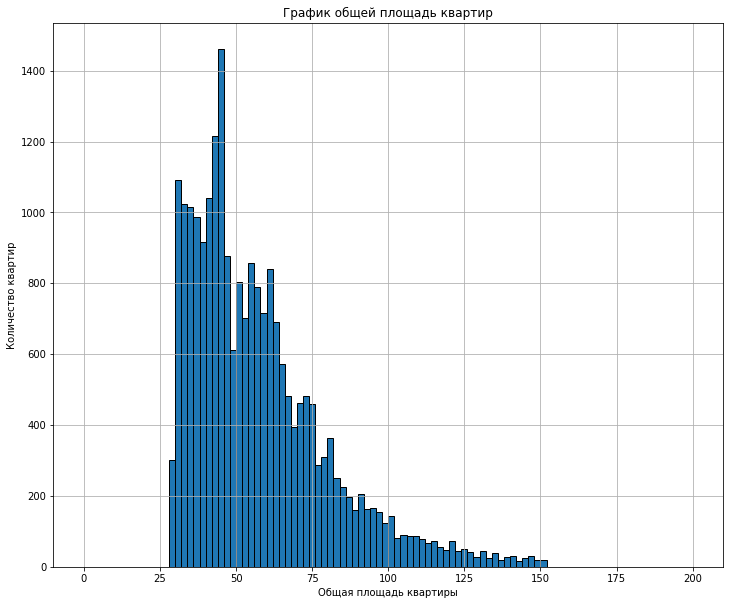

In [60]:
plt.figure(figsize=(12, 10))
data['total_area'].hist(bins=100, range=(0, 200), ec='black')
plt.title('График общей площадь квартир')
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

Как мы видим, общая площадь большинства объектов недвижимости находится в диапозоне чуть больше 25 кв.м. и меньше 150 кв.м. Попробуем сделать гистограмму еще меньше.

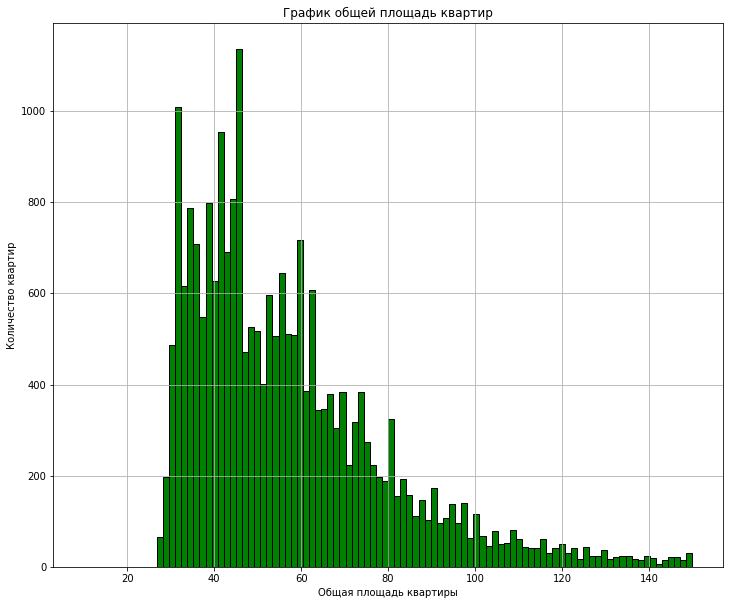

In [62]:
plt.figure(figsize=(12, 10))
data['total_area'].hist(bins=100, color='green', range=(10, 150), ec='black')
plt.title('График общей площадь квартир')
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

Построим боксплот

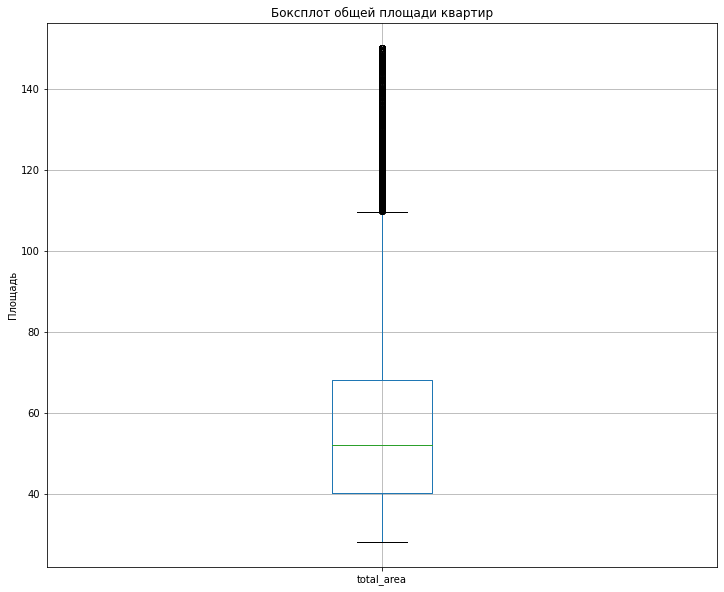

In [63]:
plt.figure(figsize=(12, 10))
data.boxplot(column='total_area')
plt.title('Боксплот общей площади квартир')
plt.ylabel('Площадь')
plt.show()

Рассматривая уменьшенный график, можно убедиться, что большая часть объектов недвижимости находится в пределах 40-65 кв.м
В связи с тем, что минимальные значения не соответствуют САНПИН - отсечем их, оставим минимальное значение - 28. Верхнее значение отсечем на отметке 150 кв.м. 

In [58]:
data = data[(data['total_area'] <= 150)&(data['total_area'] >= 28)]

`living_area`

Общая жилая площадь показатель очень важный при приобретении имущества на которую потенциальные покупатели обращают чаще всего внимание. Описание столбца нам указывает, что квартиры с наибольшим показателем общей жилой площади составляет 409 кв.м. что является явной аномалией, ткак как средний показатель составляет 29,6 кв.м., а показатели 75% от общего числа составляет 40 кв.м.
Посмотрим на гистограмму и исключим аномалии. 

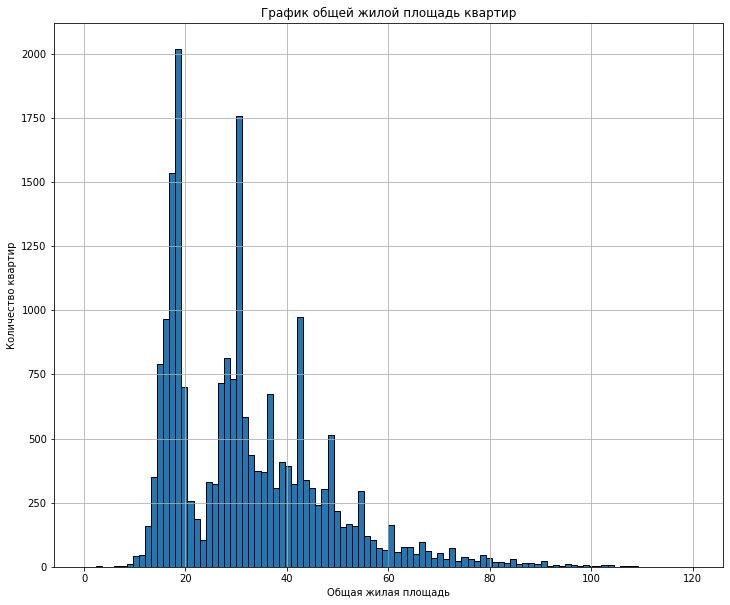

In [64]:
plt.figure(figsize=(12, 10))
data['living_area'].hist(bins=100, range=(0, 120), ec='black')
plt.title('График общей жилой площадь квартир')
plt.xlabel('Общая жилая площадь')
plt.ylabel('Количество квартир')
plt.show()

Построим боксплот

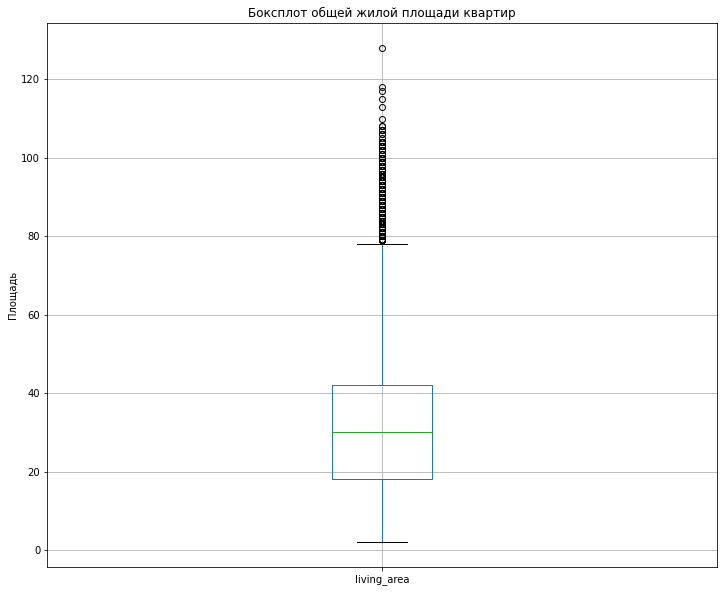

In [66]:
plt.figure(figsize=(12, 10))
data.boxplot(column='living_area')
plt.title('Боксплот общей жилой площади квартир')
plt.ylabel('Площадь')
plt.show()

Гистограмма показывает, что общая жилая площадь варьируется от 15 кв.м и достигает приблизительно 100 кв.м., в то время, как бокплот указывает, что общая жилая площадь варьируется от 2 до 78 кв.м.
Основная масса квартир имеет жилую площадь от 19 до 41 кв.м

In [67]:
data = data[(data['living_area'] <= 100)&(data['living_area'] >= 15)]

`kitchen_area`

В настоящее время квартиры с большими кухнями являются очень популярными, очень часто при приобретении квартир мы задумываемся о большой кухне, где мы можем провести свободное время с семьей и друзьями, приготовить еду и просто провести время. Помимо этого, не стоит забывать, что в представленных данных часть квартир является студиями у которых нет разграничений между кухней и комнатами. 

Построим гистограмму

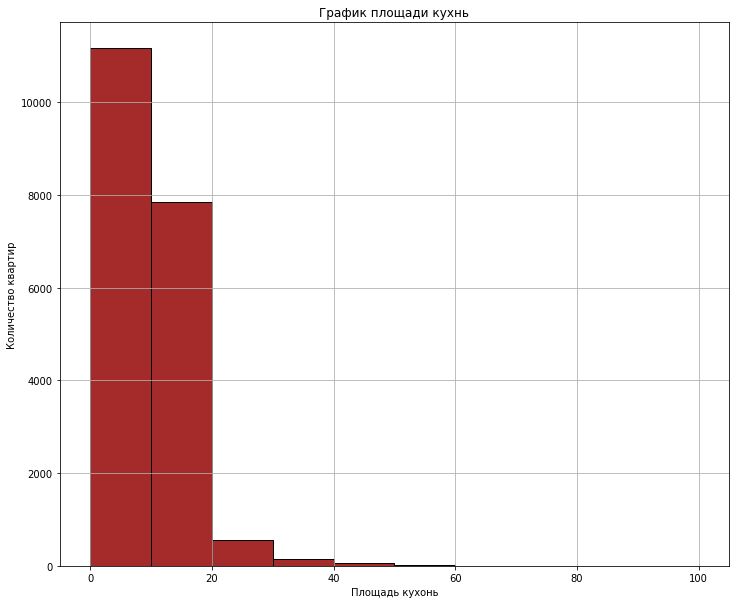

In [69]:
plt.figure(figsize=(12, 10))
data['kitchen_area'].hist(bins=10, color='brown', range=(0, 100), ec='black')
plt.title('График площади кухнь')
plt.xlabel('Площадь кухонь')
plt.ylabel('Количество квартир')
plt.show()

Построим боксплот

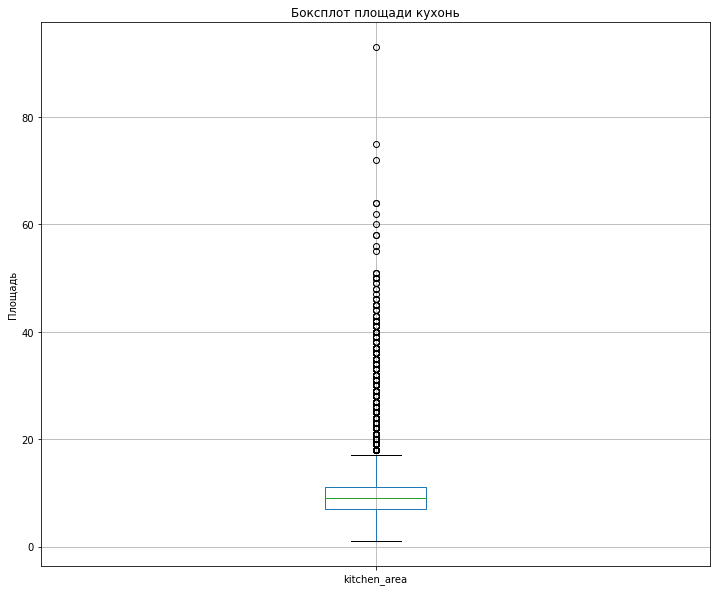

In [71]:
plt.figure(figsize=(12, 10))
data.boxplot(column='kitchen_area')
plt.title('Боксплот площади кухонь')
plt.ylabel('Площадь')
plt.show()



Анализируя описание столбца, можно отметить, что наибольшим значением в параметре площадь кухни является 112 кв.м., что превышает площадь более половины жилых помещений, представленных в настоящей базе данных. Минимальным значением является 2 кв.м., что является тоже достаточно маленьким размером кухни. Средним значением является 10 кв.м., что также не совсем подходит для рассмотрения, поскольку медианным значением является 9. 
Рассматривая боксплот можно увидеть, что основные значения находятся в пределах от 5 до 17 кв.м
Возьмем для дальнейшего анализа следующие показатели: мин - 5, макс - 30

In [72]:
data = data[(data['kitchen_area'] <= 31)&(data['kitchen_area'] >= 5)]

`rooms`

Как было указано выше, квартиры имеющие больше 6 комнат являются редкостью. Посмотрим, что покажет нам функция определения количества уникальных значения столбца `rooms`, а затем посмотроим гистограмму. 

In [73]:
data['rooms'].value_counts()

2    6998
1    6389
3    5101
4     896
5     143
6      19
7       4
Name: rooms, dtype: int64

Поскольку нами удалена часть аномальных значений в общей площади квартир, соответственно, квартиры с 8 и более комнатами были отсечены. 
Посмотрим гистограмму. 

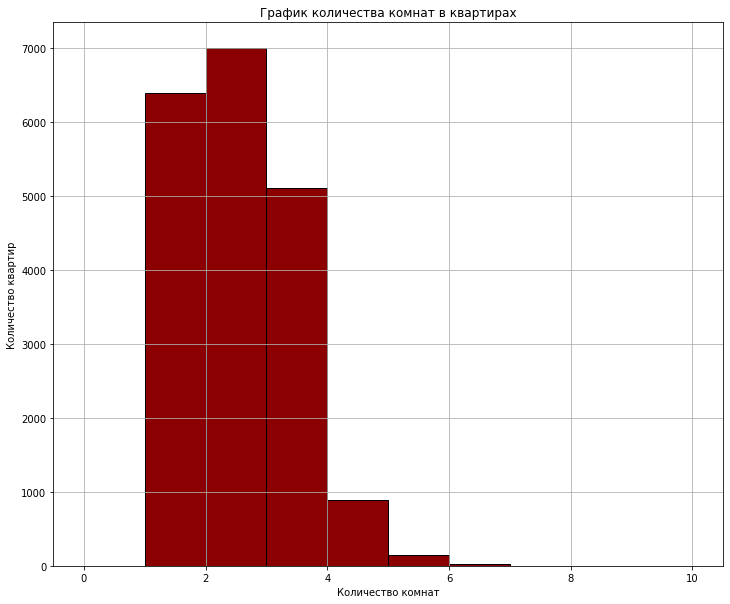

In [75]:
plt.figure(figsize=(12, 10))
data['rooms'].hist(bins=10, range=(0, 10), color='darkred', ec='black')
plt.title('График количества комнат в квартирах')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Как мы видим на гистограмме, квартир с 0, 6-7 крайне мало и на общую картину они влиять не будут. Отсечем их. 


In [77]:
data = data[(data['rooms'] <= 5)&(data['rooms'] >= 1)]

`last_price`

Самым важным критерием при приобретении жилого помещения помимо общей площади выступает цена. Описательные данные указываю, что максимальная цена за объект недвижимости в представленных данных составляет - 763 млн. рублей, в то время, как минимальная цена составляет - 12 тысяч рублей. 

Перед тем, как строить гистограмму скоратить значения до тысячных для более детального отображения данных

In [78]:
data['last_price'] = (data[data['last_price'].notnull()]['last_price']/1000*1.0).round(3)

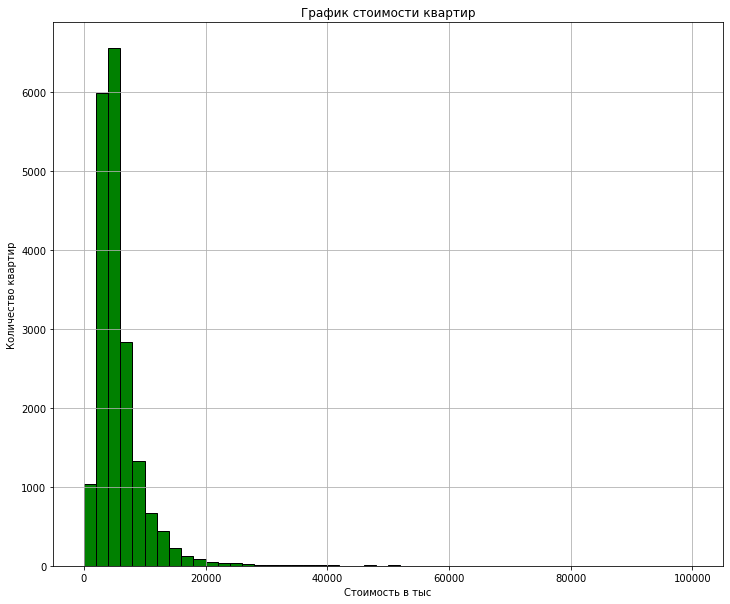

In [80]:
plt.figure(figsize=(12, 10))
data['last_price'].hist(bins=50, range=(0, 100000), color='green', ec='black')
plt.title('График стоимости квартир')
plt.xlabel('Стоимость в тыс')
plt.ylabel('Количество квартир')
plt.show()

Для более наглядного рассмотрения, построим боксплот

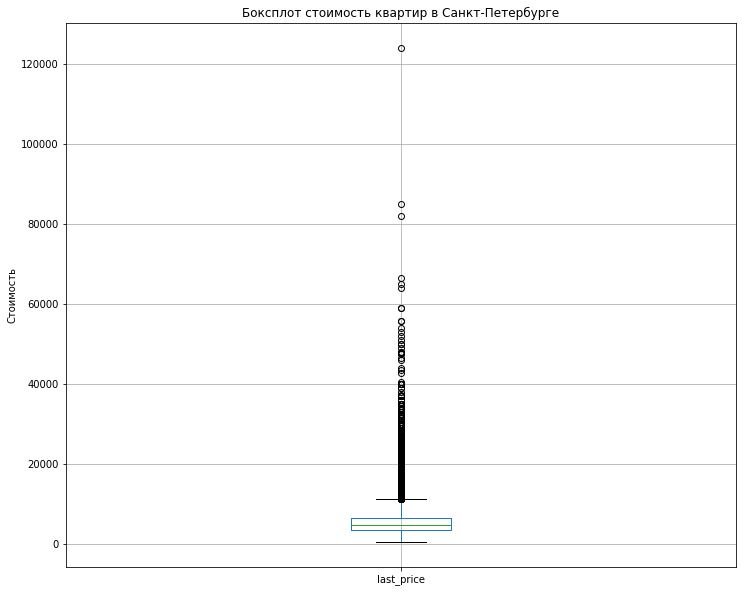

In [82]:
plt.figure(figsize=(12, 10))
data.boxplot(column='last_price')
plt.title('Боксплот стоимость квартир в Санкт-Петербурге')
plt.ylabel('Стоимость')
plt.show()

Гистограмма показывает, что средний показатель цен на недвижимость приходится от 1 до 30 млн рублей. Гистограмма фиксирует аномальные значения, однако их не так много. Боксплот указывает, что основная масса квартир по стоимости располагаются в пределаюх от 1 млн до 12

Оставляем все, как есть. Двигаемся дальше


`ceiling_height` 

Ранее в нашем исследовании мы отметили, что чем дальше размещение квартиры от центра `Санкт-Петербурга` тем меньше у нее высота потолка. 
Минимальным показателем является 2.3 м, Максимальным значением является 100 м и медианным показателем высоты потолков является 2.7 м.

Построим гистограмму

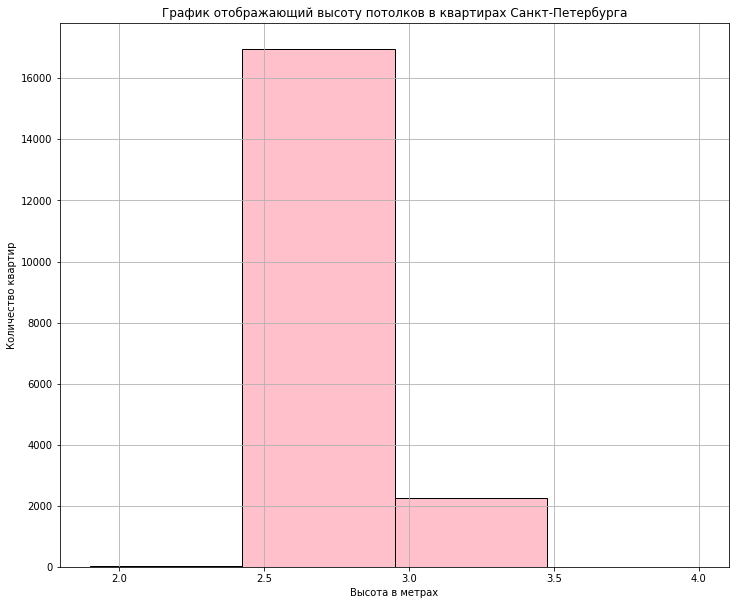

In [88]:
plt.figure(figsize=(12, 10))
data['ceiling_height'].hist(bins= 4, range=(1.9, 4), color='pink', ec='black')
plt.title('График отображающий высоту потолков в квартирах Санкт-Петербурга')
plt.xlabel('Высота в метрах')
plt.ylabel('Количество квартир')
plt.show()

Гистограмма демонстрирует, что основная масса квартир имеет высоту потолков в пределах от 2.4 и до 3.4 м. 

In [85]:
data = data[(data['ceiling_height'] <= 3.4)&(data['ceiling_height'] >= 2.4)]

`cityCenters_nearest`

Удаленность от центра города. Ранее этот показатель мы условно поделили на 4 значения:
- центр города
- недалеко от центра
- в пределах города
- недалеко от города

Описание столбца свидетельствует, что минимальным значением к центру города является 181 м и максимальным значением являются 65 968 м.

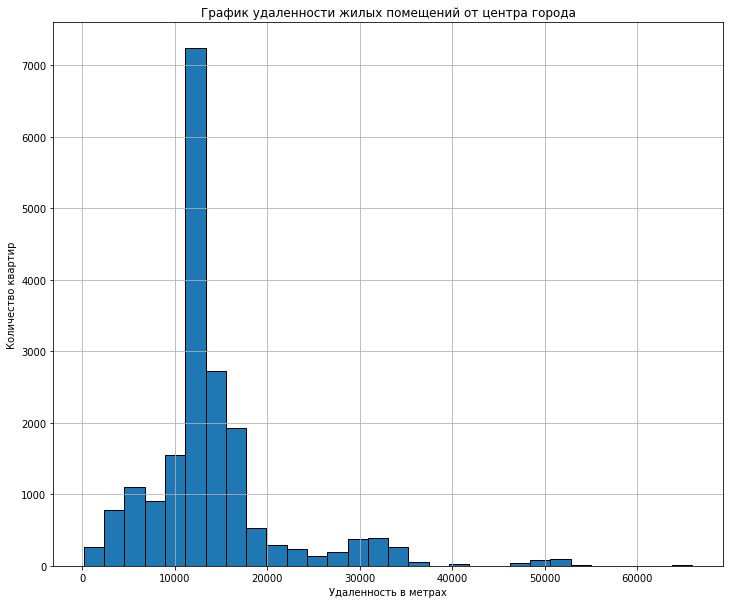

In [89]:
plt.figure(figsize=(12, 10))
data['cityCenters_nearest'].hist(bins=30, range=(181, 66000), ec='black')
plt.title('График удаленности жилых помещений от центра города')
plt.xlabel('Удаленность в метрах')
plt.ylabel('Количество квартир')
plt.show()

Если брать в расчет, что центром города является определенная точка, то значение к ней в размере 181 м является допустимым. Максимальное значение 65968 м указывает на населенный пункт, находящися недалеко от города. Оставляем все значения. 

`level` - тип этажа квартиры

Исходя из описательных данных 

In [90]:
data['level'].describe()

count      19231
unique         3
top       другой
freq       14117
Name: level, dtype: object

In [91]:
df = data['level'].value_counts()

другой       14117
последний     2739
первый        2375
Name: level, dtype: int64

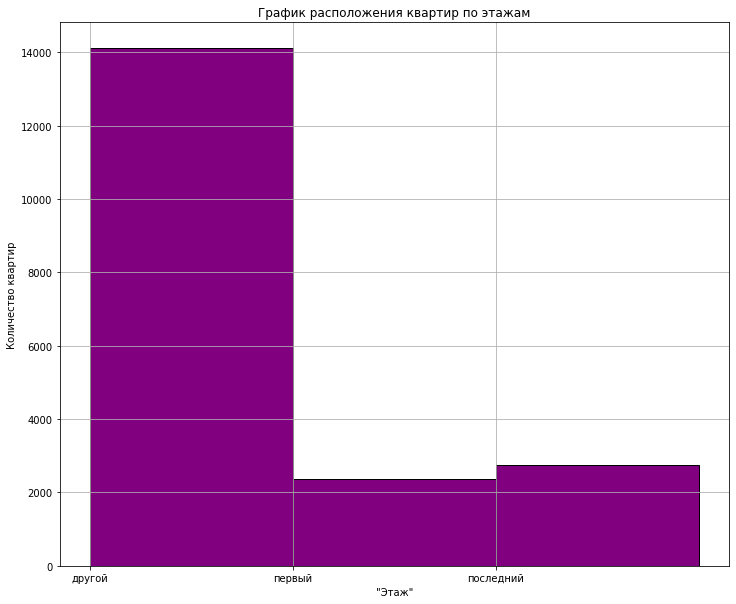

In [97]:
plt.figure(figsize=(12, 10))
data['level'].hist(bins=3, range=(0, 3), color='purple', ec='black')
plt.title('График расположения квартир по этажам')
plt.xlabel('"Этаж"')
plt.ylabel('Количество квартир')
plt.show()

Из представленных данных мы видим, что первый этаж самый малочисленный - 2382, последний этаж имеет немного больше значений - 2711. Самым значительным выступает класс другой, который содержит в себе все остальные этажи. 
Никаких аномалий не имеется, двигаемся дальше. 

**Вывод:** были проанализированы основные столбцы базы данных, а также построены гистограммы для более наглядного анализа и отображения наличия/отсутствия анамальный явлений. Так, были исключены аномальные явления в столбцах общая площадь, общая жилая площадь, площадь кухни, количество комнат, высота потолков и других столбцах.
Нами было выявлено:
- Общая площадь квартир составляет от 25 до 105 кв.м;
- Более половины объектов недвижимости стоят в пределах 2-7 млн рублей;
- Большинство квартир из списка являются 1-2 комнатными; 
- Общая площадь в основном варьируется в пределах 30-80 кв.м;
- Высота потолков варьируется от 2.4 до 3.4 метров. 

## Проведите исследовательский анализ данных

Когда мы изучили все данные представленные в базе данных, избавились от большинства пропусков, дубликатов и добавили необходимые нам значение, перешло время к проведению исследовательского анализа данных. 

### Среднее и медианное время продажи квартир

Для начала посмотрим общие данные столбца `days_exposition` 

In [98]:
data['days_exposition'].describe().to_frame().round(1)

,days_exposition
count,16672.0
mean,182.6
std,218.9
min,1.0
25%,44.0
50%,100.0
75%,234.0
max,1580.0


Полученные данные указывают, что **максимальное количество дней продажи недвижимости** - `1580 дней`, в то время, как **минимальное** - `1 день`. 
**Среднее время продажи** - `182 дней`, **медианное** - `100 дней`

Для более наглядного примера построим боксплот

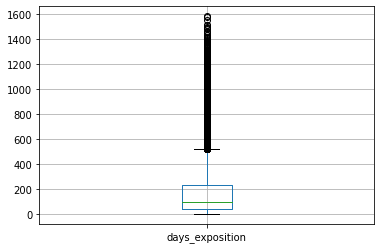

In [99]:
data.boxplot(column='days_exposition')
plt.show()

Боксплот указывает, что основная доля продажей осуществляется в период с 40 до 200 дней. Кроме того, можно обратить внимание, что продажи свыше 420 дней являются выбросами. 

In [100]:
data = data[data['days_exposition'] <= 420]

Построим гистограмму

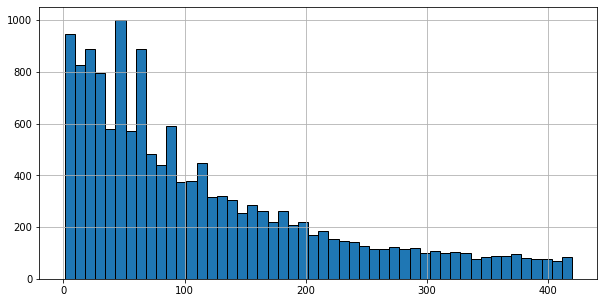

In [101]:
data['days_exposition'].hist(bins=50, figsize=(10,5), ec='black')
plt.show()

In [102]:
data['days_exposition'].describe().to_frame().round(1)

,days_exposition
count,14704.0
mean,117.0
std,103.4
min,1.0
25%,37.0
50%,83.0
75%,171.0
max,420.0


Полученные данные говорят о следующеем: 
1. Медианное время продажи квартиры составляет 90 календарных дней;
2. Среднее время продажи квартир составляет 135 календарных дней;
3. Быстрыми продажами являются продажи в период до 44 дней;
4. Долгими продажами являются продажи свыше 200 дней.

На нашем рынке недвижимости данные показатели является приемлемыми. Все квартиры, которые продаются свыше 550 дней скорее всего попали в список объявлений не снятых с сайта.

### Определение факторов влияющих на общую (полную) стоимость объекта

Стоимость квартиры обычно зависит от ряда факторов начиная от общей площади, нахождением квартиры относительно центра города, района и заканчивая индивидуальными характеристикам квартиры. 
Наша задача следующая: 
1. Узнать зависимость цены квартиры от общей площади, жилой площади и площади кухни;
2. Узнать зависимость от количества комнат;
3. Узнать зависимость от этажа, на котором расположена квартира; 
4. Узнать зависимость от даты размещения (день, неделя, месяц, год).

#### Зависимость цены квартиры от общей площади, жилой площади и площади кухни

Для анализа зависимости цены квартиры от общей площади, жилой площади и площади кухни построим тепловую карту

<AxesSubplot:>

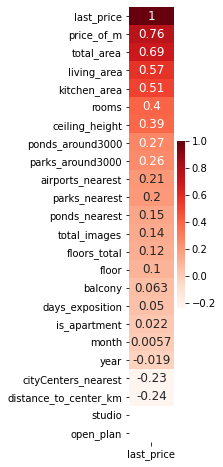

In [103]:
plt.figure(figsize=(1,8))
sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Reds", 
            annot=True, annot_kws={'size':12})

Построим графики для более наглядного рассмотрения

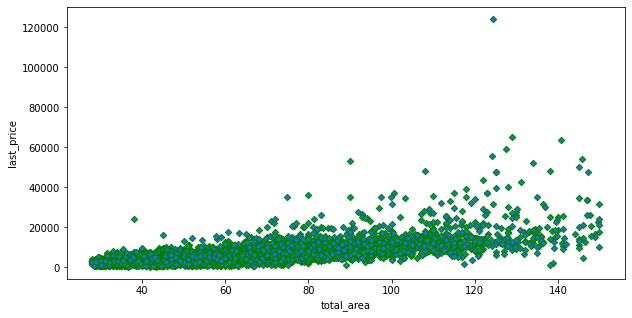

In [104]:

data.plot.scatter(x='total_area', y='last_price', figsize=(10,5), marker="D", linewidths=1, edgecolors='g')
plt.show()

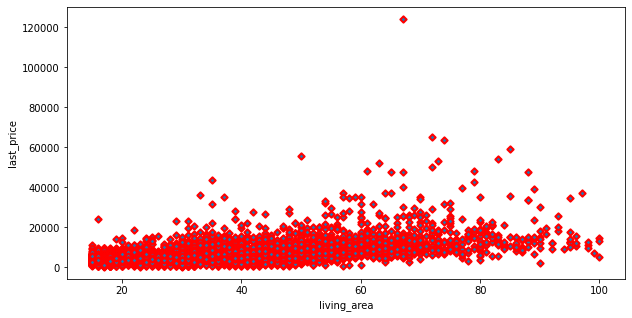

In [105]:
data.plot.scatter(x='living_area', y='last_price', figsize=(10,5), marker="D", linewidths=2, edgecolors='r')
plt.show()

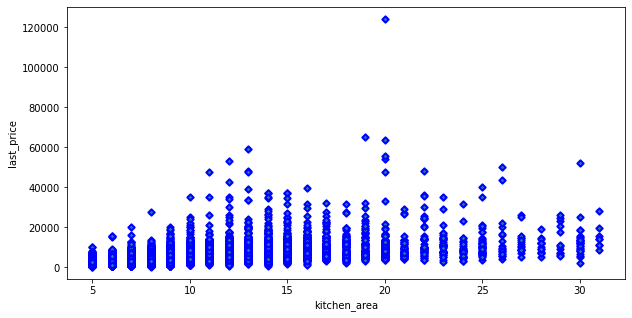

In [106]:
data.plot.scatter(x='kitchen_area', y='last_price', figsize=(10,5), marker="D", linewidths=2, edgecolors='b')
plt.show()

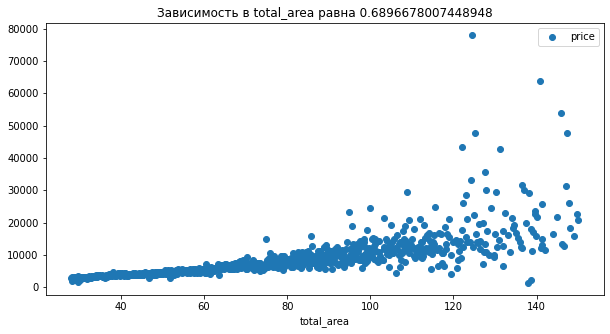

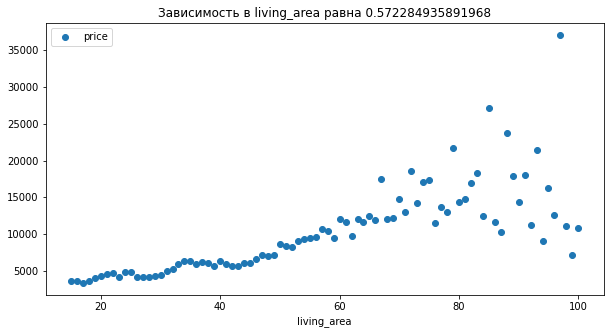

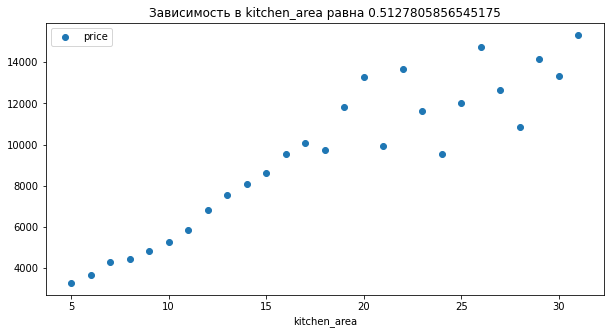

In [107]:
corr_data = ['total_area', 'living_area', 'kitchen_area']

for i in corr_data:
    pt = data.pivot_table(index = i, values = 'last_price')
    pt.columns = ['price']
    pt.plot(y = 'price', style = 'o', figsize=(10,5), title=f'Зависимость в {i} равна {data[i].corr(data["last_price"])}')

Рассматривая полученную тепловую карту и графики можно отметить, что общая площадь квартиры, жилая площадь и площадь кухни имеют очень большую зависимость на цену квартиры. Большую зависимость имеет только цена за 1 кв.м. Таким образом можно выделить закономерность, что чем больше площадь квартиры - тем больше стоимость квартиры. 

#### Зависимость цены от количества комнат, расположения этажа и удаленности от центра города 

Для наглядного обзора зависимостей напишем функцию, которая позволит нам отобразить все на графиках

In [108]:
def price_dependence(df, column):
    title_dict = {'rooms': 'Зависимость цены от количества комнат', 'level': 'Зависимость цены от этажа',
                  'distance_to_center': 'Зависимость цены от удаленности от центра города',
                  'day':'Медиана цен по дням недели', 'month': 'Медиана цен по месяцам',
                  'year': 'Медиана цен по годам', 
                  'distance_to_center_km': 'Зависимость цены от удаленности от центра города'}
    plt.style.use('seaborn-pastel')
    if column == 'level' or column == 'distance_to_center':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'distance_to_center':
        fontsize = 10
    else:
        fontsize = 8
    df_filtered = df.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
    plot = df_filtered.plot(x=column, y="last_price", kind='bar', 
                            title=title_dict[column], legend=None, 
                            fontsize=fontsize, figsize=(10,5))
    ax2 = plt.gca()  
    x_axis = ax2.xaxis
    x_axis.label.set_visible(False)
    if column != 'distance_to_center_km':
        plt.xticks(rotation=0)
    return plot

Построим график зависимости цены от количества комнат в квартире

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

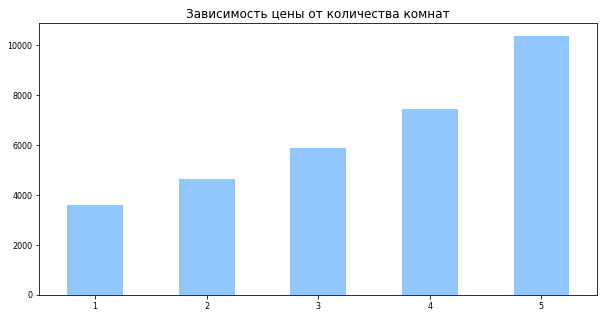

In [109]:
price_dependence(data, 'rooms')

Ничего необычного, чем больше количество комнат - тем дороже стоимость квартиры.

Перейдем к зависимости от **этажей**

<AxesSubplot:title={'center':'Зависимость цены от этажа'}, xlabel='level'>

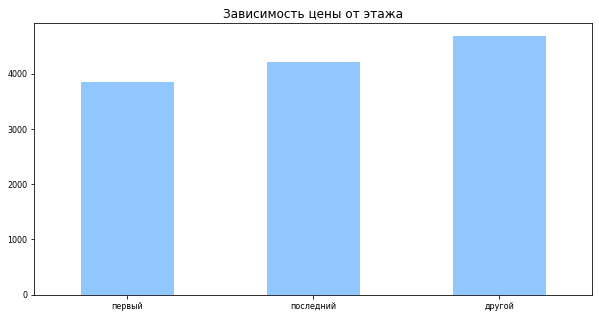

In [110]:
price_dependence(data, 'level')

Существенных отличий цены от расположения на первом, последнем и других этажах не наблюдается. 

Зависимость цены от удаленности от центра города

<AxesSubplot:title={'center':'Зависимость цены от удаленности от центра города'}, xlabel='distance_to_center'>

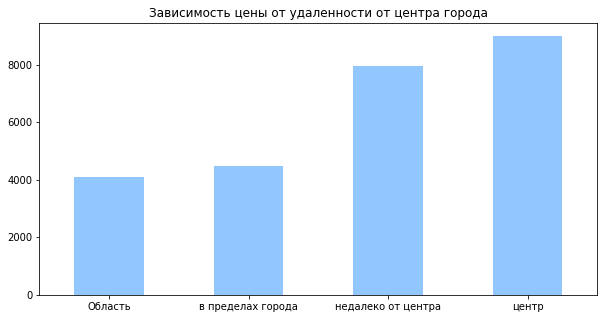

In [111]:
price_dependence(data, 'distance_to_center')

**Выводы:** 

1. Чем больше комнат в квартире - большее площадь и соответственно больше цена
2. Существенной разницы в цене между первым, последним и другими этажами не имеется
3. Чем дальше квартира от центра города - тем она дороже

#### Зависимость цены от дня недели, месяца и года 

Построим функцию для определения зависимостей

In [112]:
list_int = ['last_price', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'floors_total']

for column in list_int:
    data[column] = data[data[column].notnull()][column].astype('int')

list_float = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']

for column in list_float:
    data[column] = data[data[column].notnull()][column].round(1)

In [113]:
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,distance_to_center,price_of_m,year,month,day,level,distance_to_center_km
1,7,3350,40.4,2018-12-04,1,2.7,11.0,18.0,1,False,...,0,0,81,Область,82.921,2018,12,2 - вторник,первый,18


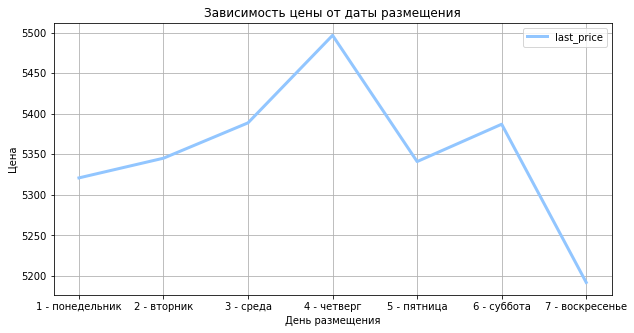

In [114]:
(data.pivot_table(index='day', values=['last_price']).plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость цены от даты размещения')
)
plt.xlabel('День размещения')
plt.ylabel('Цена')

plt.show()

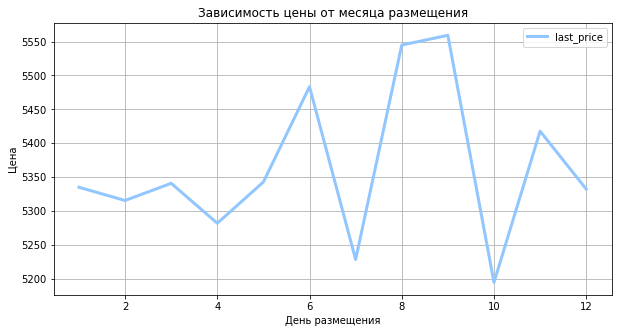

In [115]:
(data.pivot_table(index='month', values=['last_price']).plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость цены от месяца размещения')
)
plt.xlabel('День размещения')
plt.ylabel('Цена')

plt.show()

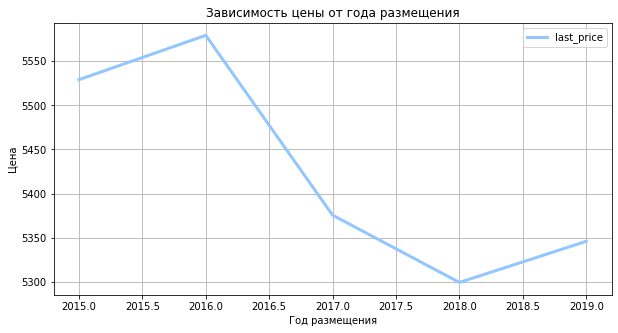

In [116]:
(data.pivot_table(index='year', values=['last_price']).plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость цены от года размещения')
)
plt.xlabel('Год размещения')
plt.ylabel('Цена')

plt.show()

Указанные графики демонстрируют: 
1. Цена на недвижимость растет в период с понедельника по четверг после чего движется вниз.
2. Вначале июля и в конце сентября зафиксировано резкое падение цен на недвижимость. 
3. С 2015 года заметно цены на недвижимость упали, однако в 2018 наблюдается позитивная тенденция роста цен



Есть гипотеза, что цена на недвижимость с 2015 года по 2018 не упала, а уменьшилась площадь продаваемой недвижимости. Попробуем проверить эту теорию рассмотрев зависимость года размещения объявления и общей площади недвижимости

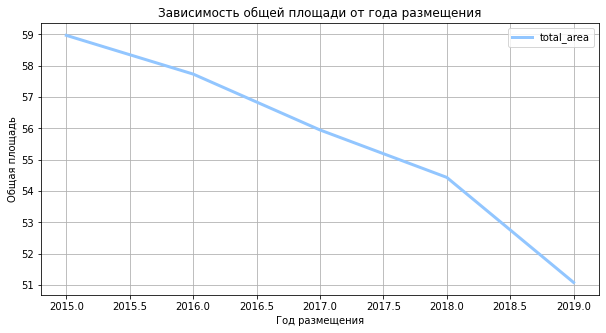

In [117]:
(data.pivot_table(index='year', values=['total_area']).plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость общей площади от года размещения')
)
plt.xlabel('Год размещения')
plt.ylabel('Общая площадь')

plt.show()

Наша гипотеза подтвердилась, в период с 2015 по 2019 год размер продаваемой недвижимости падал это связано в первую очередь с тем, что самыми продаваемыми квартирами являются 1-2 комнатные с общей площадью до 65 кв.м. 


### Определение средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 

In [118]:
top_cities10 = data['locality_name'].value_counts().index.tolist()[0:10]
mean_meters = [data[data['locality_name'] == city]['price_of_m'].median().round(2) for city in top_cities10 ]
mean_price = [data[data['locality_name'] == city]['last_price'].median().astype(int) for city in top_cities10]
frame = {'Город': top_cities10, 'Средняя цена за кв.м. в тыс.руб': mean_meters, 'Средняя цена за квартиру в тыс.руб': mean_price}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м. в тыс.руб', ascending=False)
dataframe

,Город,Средняя цена за кв.м. в тыс.руб,Средняя цена за квартиру в тыс.руб
0,Санкт-Петербург,101.71,5150
6,Пушкин,97.46,4900
3,Кудрово,94.44,3990
8,Парголово,88.37,4200
1,Мурино,83.48,3600
9,Петергоф,81.94,3599
2,Шушары,75.14,4000
4,Колпино,73.11,3560
7,Гатчина,67.19,3050
5,Всеволожск,65.27,3500


Нами установлено, что самая дорогая недвижимость из Топ-10 городов находится в Санкт-Петербурге, а самая дешевая в Всеволожске. 

In [119]:
top_cities10 = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
top_cities10.columns=['number_of_ads']
top_cities10

,number_of_ads
locality_name,
Санкт-Петербург,9862
Мурино,328
Шушары,304
Кудрово,287
Колпино,264
Всеволожск,240
Пушкин,225
Гатчина,215
Парголово,196


Низкое количество объявлений никак не влияет на цену, об этом свидетельствует объявления по населенным пунктам Паргалово и Петергоф имеющие самое маленькое количество объявлений, в то время, как по стоимости жилья объявления в данных городах не уступают Шушарам, у которых количество объявлений в разы больше. 

In [120]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}).astype(int) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,9862,5150
Мурино,328,3600
Шушары,304,4000
Кудрово,287,3990
Колпино,264,3560
Всеволожск,240,3500
Пушкин,225,4900
Гатчина,215,3050
Парголово,196,4200


### Средняя цена квадратного метра квартиры для каждого километра в Санкт-Петербурге в районе 10 километров

Для проведения анализа нам необходимо исследовать цену квадратного метра жилья по удаленности от центра:

Для этого необходимо:
1. Сгруппировать данные по удаленность (1 км)
2. Сохранить данные только в пределах Санкт-Петербурга
3. Вывести график медианы цен для каждой категории.

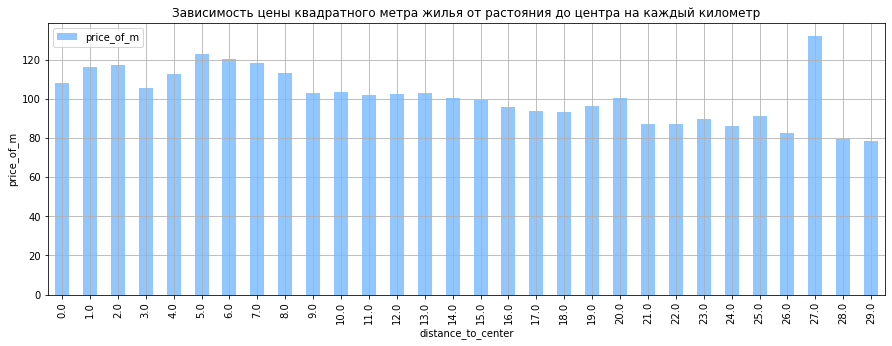

In [121]:
data['distance_to_center'] = round(data['cityCenters_nearest']/1000)
data_spb_pivot = (
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_to_center', values='price_of_m', aggfunc=['median']))
data_spb_pivot.columns = ['price_of_m']
data_spb_pivot.plot(y='price_of_m', xlabel='distance_to_center', kind='bar',
                  grid=True, linewidth=2, style='o-', figsize=(15,5), fontsize=10)
plt.title('Зависимость цены квадратного метра жилья от растояния до центра на каждый километр')
plt.ylabel('price_of_m')
plt.show()

График показывает:

- Спад плавный спад цен после 5 км от центра;
- На 27 км. зафиксирован выброс, скорее всего это аномальное значение.
- Пределом центра города по графику можно считать 8 км.

## Общий вывод

   В данной работе были исследован данные архива объявлений сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населенных пунктов за последние несколько лет.

   На первом этапе исследования была осуществлена предработка данных, в рамках которой были добавлены пропущенные значения, изменение типов данных и обработка дубликатов. 
    
   После предработки данных были изучены параметры объектов, при построении гистограмм выявлены и исключены редкие и выбивающиеся значения, а также добавлены необходимые для дальнейшего исследования столбцы: 
- **цена за 1 м.кв** - `price_of_m`
- **год и месяц публикации** - `year` and `month`
- **день публикации** - `day`
- **тип этажа квартиры** - `level`
- **расстоние в км до центра города** - `distance_to_center_km`

В рамках исследовательского анализа нами была установлена средняя скорость продажи квартир:
1. Медианное время продажи квартиры составляет 90 календарных дней;
2. Среднее время продажи квартир составляет 135 календарных дней;
3. Быстрыми продажами являются продажи в период до 44 дней;
4. Долгими продажами являются продажи свыше 220 дней.


Установлены факторы, которые больше всего влияют на цену квартир: 
1. **Общая площадь** - имеет прямую зависимость на цену квартиры. С ростом площади квартиры растет и ее цена. 
2. **Растояние от центра города** - чем дальше находится недвижимость от центра города тем она дешевле. 
3. **Категория этажей** - не особо влияет на формирования общей цены. На графиках наблюдаются незначительное превосходство `других` этаже над первым и последним. 
4. **Количество комнат** - напрамую влияет на цену квартиры. Это в первую очередь связано с тем, что количество комнат в квартире влияет на ее площадь.
5. **Зависимость от дня, месяца и года размещения** - Прямой зависимости от года размещения объявления не установлено. Самыми неудачными месяцами для размещения объявления являются июль и сентябрь. Также установлено, что ценовой диапазон зависит и от дня размещения, самый удачный день для размещения - среда. 


Далее нами была установлена средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

**Анализ вышеуказанных данных позволил нам установить следующие закономерности:**
- Чем больше площадь квартиры, тем выше ее цена.
- Чем дальше расположена от центра города квартира, тем цена ниже.
- Чем больше комнат в квартире, тем выше цена.
- На первом этаже квартира дешевле, чем на остальных, на последнем дороже, чем на первом, но дешевле чем на остальных.
- Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные;
- с 2015 года наблюдается тенденция продажи недвижимости с меньшей общей площадью, чем за предыдущие года. Это связано с тем, что из размещенных объявлений большинство о продаже квартир с 1-2 комнатами общей площадью до 60 кв.м



